# Exploratory Analysis

The following notebbok covers Exploratory Data Analysis (EDA) of the provided dataset. <br>
Language : Python <br>
Kernel : Conda Python 3 
<br>
Various inferences can be drawn using suppporting visualisations of the datasets. The notebook also contains correlation analysis and a linear regression model to examine the variable importance & check multicollinearity, hetroscedasticity in the dataset. Kindly note, <b> This notebook doesn't contain the final model code. the code can be found in a separate R file. </b>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("UNI.csv")
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [3]:
df.shape

(1000, 12)

In [31]:
df.isnull().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

## Exploratory Data Analysis

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_eda = df.drop("v.id", axis = 1)
df_eda.head()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [5]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
on road old      1000 non-null int64
on road now      1000 non-null int64
years            1000 non-null int64
km               1000 non-null int64
rating           1000 non-null int64
condition        1000 non-null int64
economy          1000 non-null int64
top speed        1000 non-null int64
hp               1000 non-null int64
torque           1000 non-null int64
current price    1000 non-null float64
dtypes: float64(1), int64(10)
memory usage: 86.0 KB


In [6]:
df_eda.describe()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


D:\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


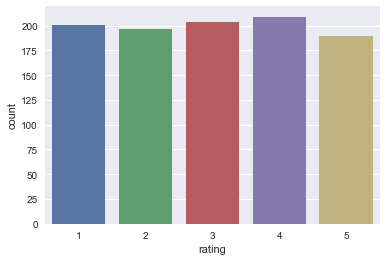

In [16]:
sns.countplot(df_eda.rating)

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


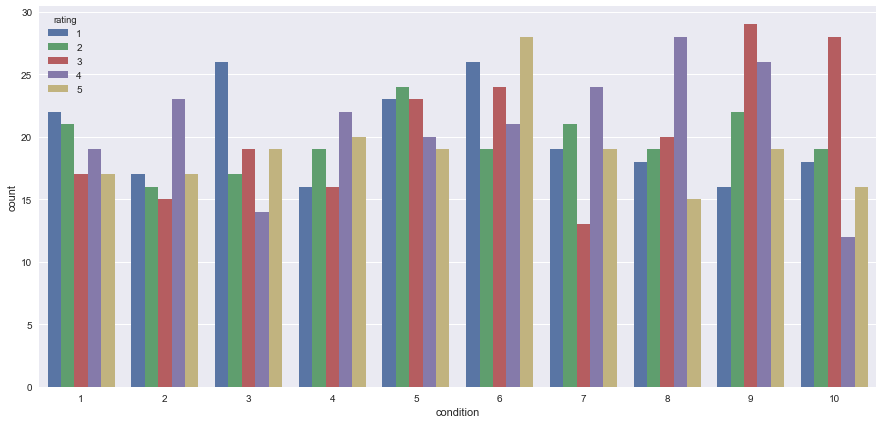

In [15]:
plt.subplots(figsize = (15,7))
sns.countplot("condition", hue = "rating", data = df_eda)

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


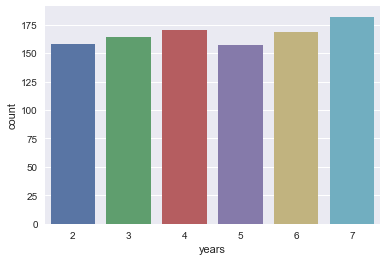

In [17]:
sns.countplot(df_eda.years)

No handles with labels found to put in legend.
D:\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


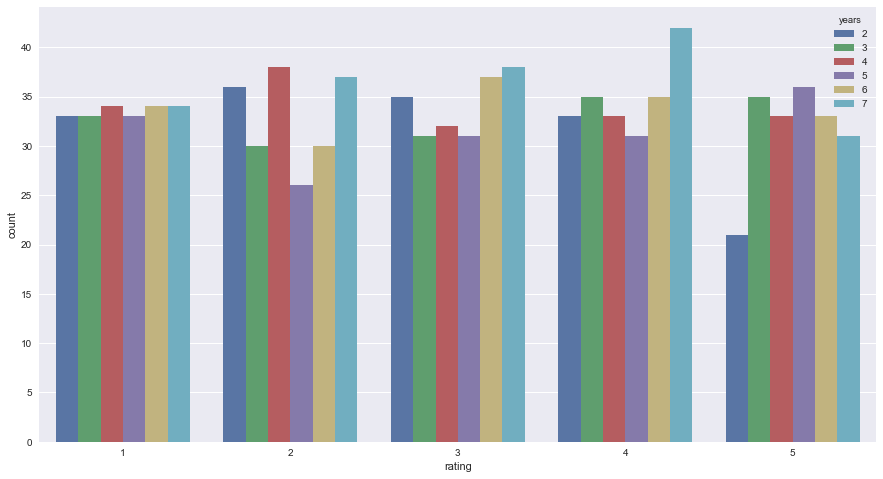

In [26]:
plt.subplots(figsize = (15,8))
plt.legend(loc = "best")
sns.countplot("rating", hue = "years", data = df_eda)

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


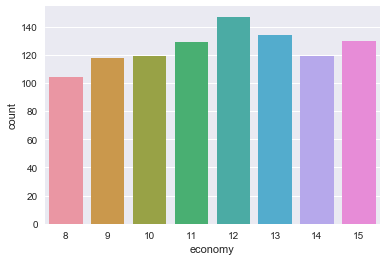

In [27]:
sns.countplot(df_eda.economy)

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


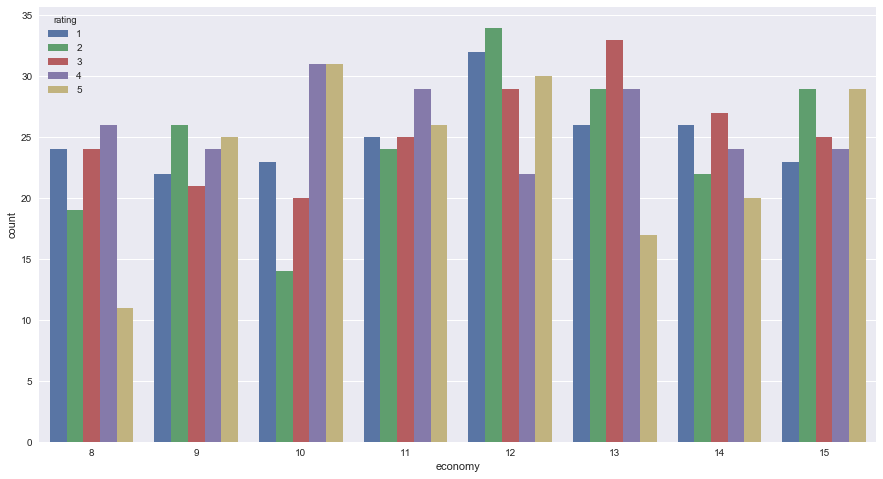

In [30]:
plt.subplots(figsize = (15,8))
sns.countplot("economy", hue = "rating", data = df_eda)

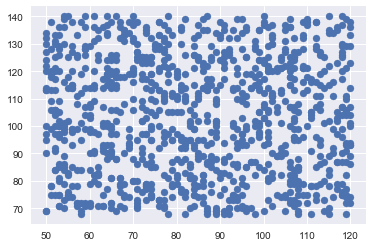

In [42]:
plt.scatter(x="hp", y = "torque", data = df_eda)

In [5]:
df_eda.head()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,691388,811335,6,61559,3,9,12,160,53,105,531114.5


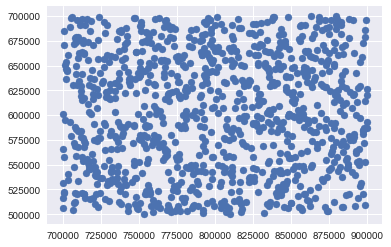

In [6]:
plt.scatter(x = "on road now", y = "on road old", data = df_eda)

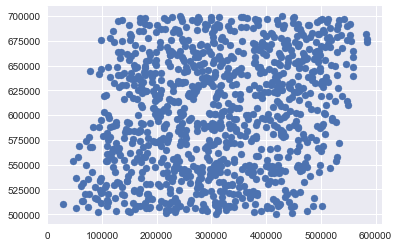

In [7]:
plt.scatter(x = "current price", y = "on road old", data = df_eda)

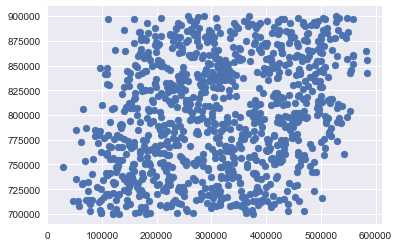

In [9]:
plt.scatter(x = "current price", y = "on road now", data = df_eda)

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


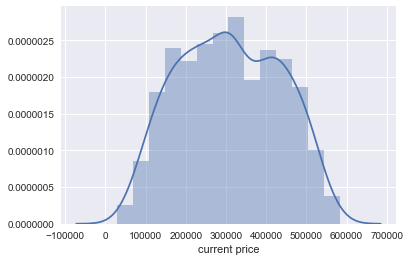

In [12]:
sns.distplot(df_eda["current price"])

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


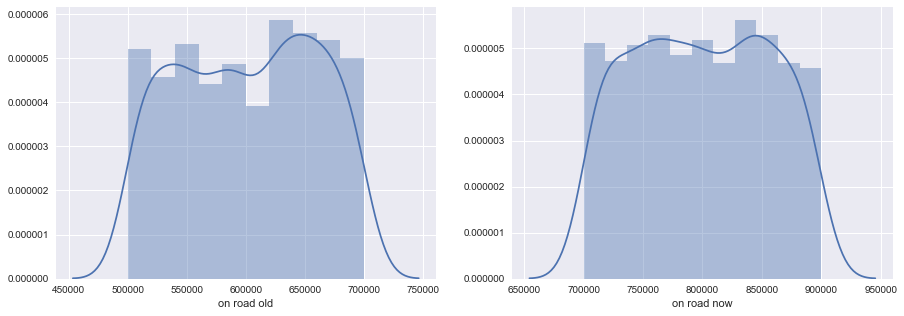

In [25]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(df_eda["on road old"])

plt.subplot(1,2,2)
sns.distplot(df_eda["on road now"])

## Multi Collinearity Check

In [29]:
corr_mat = df_eda.drop("current price", axis = 1).corr()

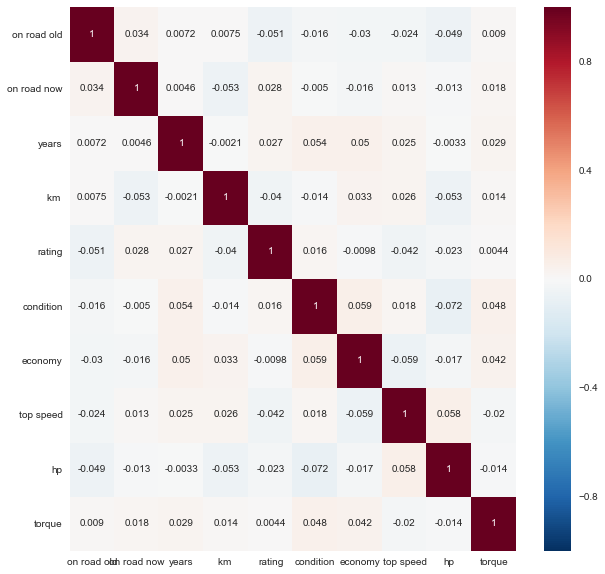

In [33]:
plt.subplots(figsize = (10,10))
sns.heatmap(corr_mat, annot=True)

There seems to be no Multicollinearity. 

## Linear Regression

In [35]:
df = df.sample(frac=1)
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
498,499,520755,714287,6,141565,1,9,13,146,95,128,77167.0
569,570,601462,700177,3,69779,4,6,15,176,56,114,376267.5
308,309,571728,707666,4,78673,4,7,12,179,77,94,333655.5
572,573,671230,719802,2,75622,2,6,10,200,120,114,397183.0
300,301,532784,822216,4,69525,1,8,9,181,111,68,415493.0


In [36]:
X = df.drop(["v.id","current price"], axis = 1)
Y = df["current price"]

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3, random_state = 26)

### Sklearn linear regression

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [64]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7055.061432403539
Mean Squared Error: 70803479.88362017
Root Mean Squared Error: 8414.4803691981


### Stats models linar regression

In [50]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [65]:
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          current price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.449e+05
Date:                Sat, 31 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:15:32   Log-Likelihood:                -10491.
No. Observations:                1000   AIC:                         2.100e+04
Df Residuals:                     990   BIC:                         2.105e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
on road old     0.5005      0.004    119.848      

### Some statistical tests

In [51]:
#Breusch Pagan
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 481.9207415393447),
 ('p-value', 4.2631812475443645e-98),
 ('f-value', 92.09045263490009),
 ('f p-value', 5.871568669075489e-134)]

In [53]:
#Goldfeld-Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

[('F statistic', 1.1036184948558225), ('p-value', 0.1377548607125337)]

There seems to be no conditional hetroscedasticity